In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("computer_purchase.csv")
df

,Age,Income,Student,CreditRating,BuysComputer
0,<=30,High,No,Fair,No
1,<=30,High,No,Excellent,No
2,31...40,High,No,Fair,Yes
3,>40,Medium,No,Fair,Yes
4,>40,Low,Yes,Fair,Yes
5,>40,Low,Yes,Excellent,No
6,31...40,Low,Yes,Excellent,Yes
7,<=30,Medium,No,Fair,No
8,<=30,Low,Yes,Fair,Yes
9,>40,Medium,Yes,Fair,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           14 non-null     object
 1   Income        14 non-null     object
 2   Student       14 non-null     object
 3   CreditRating  14 non-null     object
 4   BuysComputer  14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes


In [9]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df['Age'] = oe.fit_transform(df[['Age']])
df['Income'] = oe.fit_transform(df[['Income']])
df['Student'] = oe.fit_transform(df[['Student']])
df['CreditRating'] = oe.fit_transform(df[['CreditRating']])
df['BuysComputer'] = oe.fit_transform(df[['BuysComputer']])

In [10]:
df

,Age,Income,Student,CreditRating,BuysComputer
0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0
3,2.0,2.0,0.0,1.0,1.0
4,2.0,1.0,1.0,1.0,1.0
5,2.0,1.0,1.0,0.0,0.0
6,0.0,1.0,1.0,0.0,1.0
7,1.0,2.0,0.0,1.0,0.0
8,1.0,1.0,1.0,1.0,1.0
9,2.0,2.0,1.0,1.0,1.0


In [11]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
x,y

(    Age  Income  Student  CreditRating
 0   1.0     0.0      0.0           1.0
 1   1.0     0.0      0.0           0.0
 2   0.0     0.0      0.0           1.0
 3   2.0     2.0      0.0           1.0
 4   2.0     1.0      1.0           1.0
 5   2.0     1.0      1.0           0.0
 6   0.0     1.0      1.0           0.0
 7   1.0     2.0      0.0           1.0
 8   1.0     1.0      1.0           1.0
 9   2.0     2.0      1.0           1.0
 10  1.0     2.0      1.0           0.0
 11  0.0     2.0      0.0           0.0
 12  0.0     0.0      1.0           1.0
 13  2.0     2.0      0.0           0.0,
 0     0.0
 1     0.0
 2     1.0
 3     1.0
 4     1.0
 5     0.0
 6     1.0
 7     0.0
 8     1.0
 9     1.0
 10    1.0
 11    1.0
 12    1.0
 13    0.0
 Name: BuysComputer, dtype: float64)

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [16]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',random_state=42)
model.fit(xtrain,ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [23]:
from sklearn.metrics import accuracy_score
prediction = model.predict(xtest)
print("prediction:",prediction)
accuracy = accuracy_score(ytest,prediction)
print("accuracy is" ,accuracy)

prediction: [1. 0. 1.]
accuracy is 0.6666666666666666


In [25]:
model1 = DecisionTreeClassifier(criterion='entropy',random_state=42)
model1.fit(xtrain,ytrain)
prediction1 = model1.predict(xtest)
print("prediction is",prediction1)
accuracy1 = accuracy_score(ytest,prediction1)
print("accuracy is" ,accuracy1)

prediction is [1. 1. 1.]
accuracy is 1.0


[Text(0.4, 0.9, 'x[0] <= 0.5\nentropy = 0.994\nsamples = 11\nvalue = [5, 6]'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'x[2] <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [5, 4]'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'x[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3, 0.3, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.5, 'x[1] <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.7, 0.3, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.9, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]')]

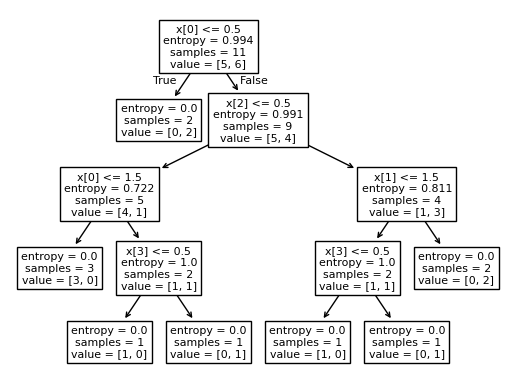

In [20]:
from sklearn import tree
tree.plot_tree(model1.fit(xtrain,ytrain))